<a href="https://colab.research.google.com/github/sp1999/SHALA2020/blob/master/Assignment_4_ML_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [142]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [143]:
df = df[df.Target < 5]
df.shape

(19648, 9)

In [0]:
X = df.MedInc
y = df.Target

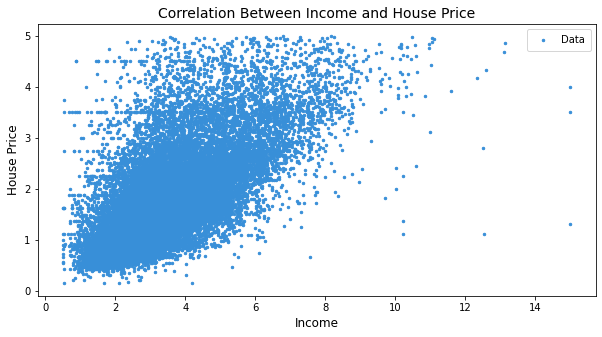

In [145]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  ################################################
  ####write your code here######################## 
  #################################################       
  
  # Initializing m, b and mse to 0 
  m = np.zeros(1)
  b = 0
  mse = []
  
  for i in range(epochs):
    # Creating a small training data set of size batch_size  
    temp_X = X.sample(batch_size)
    temp_y = y.sample(batch_size)
    temp_X = np.array(temp_X)
    temp_y = np.array(temp_y)

    # Initializing gradients to 0
    m_gradient = np.zeros(1)
    b_gradient = 0

    # Calculating gradients for points in our batch_size sized dataset
    for j in range(batch_size):
      pred = np.dot(m,temp_X[j]) + b
      mse.append(mean_squared_error(y, m*X+b))
      m_gradient += (-2)*temp_X[j]*(temp_y[j]-(pred))
      b_gradient += (-2)*(temp_y[j]-(pred))

    # Updating the weights(m) and bias(b) with the above calculated gradients
    m -= lr*(m_gradient/batch_size)
    b -= lr*(b_gradient/batch_size)
  return m, b, mse

In [0]:
m, b, mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.633449853492716


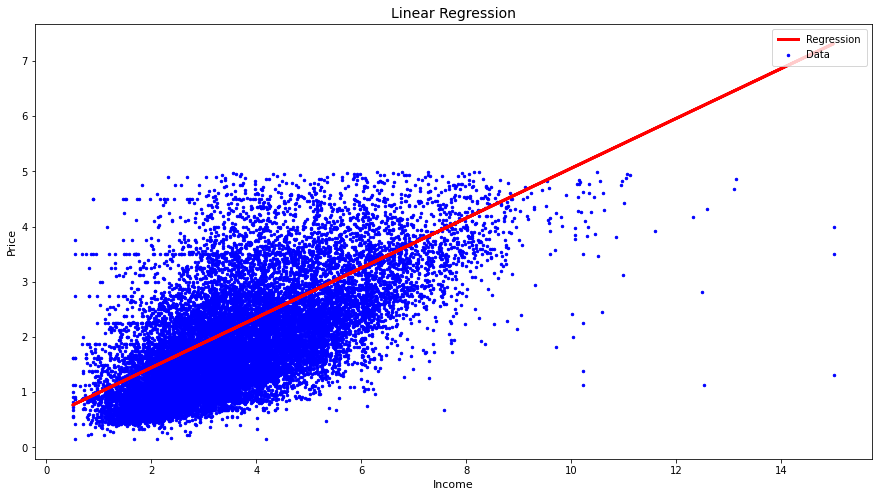

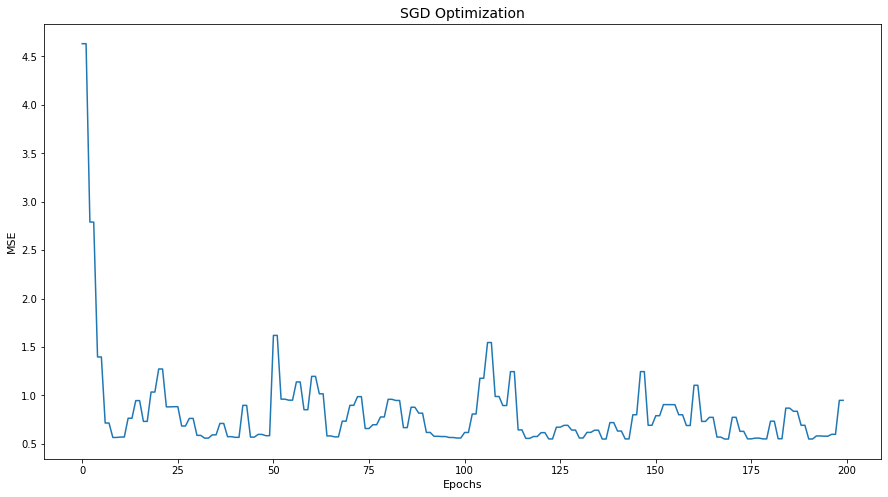

In [148]:
y_pred = m*X + b

################################################
###########write your code#####################
###############################################
print("MSE:",mean_squared_error(y, y_pred))
plt.figure(figsize=(15,8))
plt.scatter(X, y, label='Data', c='blue', s=6)
plt.plot(X, y_pred, c='red', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()


plt.figure(figsize=(15,8))
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



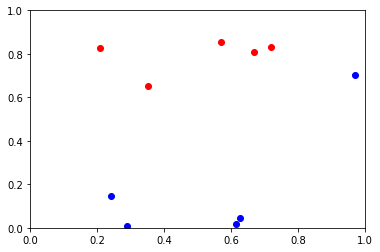

In [151]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):
    ###################################
    ### Write your code here###########
    ###################################
    w=np.zeros(len(x[0])+1)
    x=np.insert(x,2,1,axis=1)
    for t in range(1,epoch+1):
      i=np.random.randint(0,len(x),1)
      if ((y[i[0]])*(x[i[0]]@w)<1):
        w=((1-(1/t))*w)+((l_rate)*(y[i[0]]))*(x[i[0]])
      else:
        w=(1-(1/t))*w
    return w

# **Run SVM Classifier**


In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



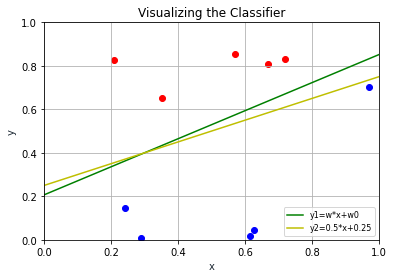

In [154]:
###################################
### Write your code here###########
###################################
x = np.linspace(-5,5,100)
y1 = (((-w[0])*(x))-w[2])/w[1]
y2 = 0.5*x+0.25
plt.plot(x, y1, '-g', label='y1=w*x+w0')
plt.plot(x, y2, '-y', label='y2=0.5*x+0.25')
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)
plt.title('Visualizing the Classifier')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='lower right',prop={'size':8})
plt.grid()
plt.show()